# Kurapati Venkatesh
# 09012021
# Topic: Recommendation Engine

# ---------------------------------------------------------------------------

## The Entertainment Company, which is a startup online movie watching platform, wants to improvise its collection of movies and showcase those that are highly rated, and recommend those movies to its customer by their movie watching footprints. For this the company has collected its data and shared it with you to provide some analytical insights and also to come up with a Recommendation Algorithm so that it can automate its process for effective recommendations based on Users Interest and behavior patterns. 

## -----------------------------------------------------------------------------------

### Business objective: To help the video gaming industry to build recommendation engine so that the store can improve the sales of its gaming DVD’s.

## -------------------------------------------------------------------------------------------

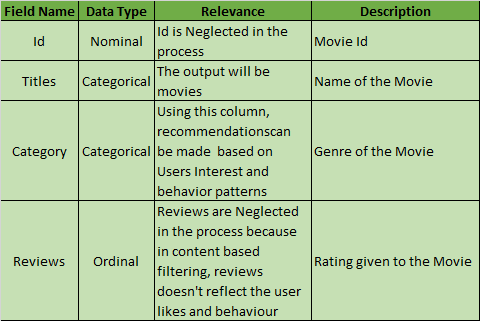

## -------------------------------------------------------------------------------------------

### Content-Based Recommendations systems are the systems that look for similarity before recommending something.

##### Import Libraries:

In [54]:
import numpy as np
import pandas as pd

##### Load the Dataset:

In [55]:
df = pd.read_csv("G:\\360digit\\assignments meterial\\recommendation sys\\Entertainment.csv")

In [56]:
df.head()

,Id,Titles,Category,Reviews
0,6973,Toy Story (1995),"Drama, Romance, School, Supernatural",-8.98
1,6778,Jumanji (1995),"Action, Adventure, Drama, Fantasy, Magic, Mili...",8.88
2,9702,Grumpier Old Men (1995),"Action, Comedy, Historical, Parody, Samurai, S...",99.00
3,6769,Waiting to Exhale (1995),"Sci-Fi, Thriller",99.00
4,1123,Father of the Bride Part II (1995),"Action, Comedy, Historical, Parody, Samurai, S...",-0.44


In [57]:
df.describe()

,Id,Reviews
count,51.000000,51.000000
mean,6351.196078,36.289608
std,2619.679263,49.035042
min,1110.000000,-9.420000
25%,5295.500000,-4.295000
50%,6778.000000,5.920000
75%,8223.500000,99.000000
max,9979.000000,99.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        51 non-null     int64  
 1   Titles    51 non-null     object 
 2   Category  51 non-null     object 
 3   Reviews   51 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [94]:
print(df.isnull().sum()) 

Id          0
Titles      0
Category    0
Reviews     0
dtype: int64


## EDA:

###### Lets explore the data a bit and get a look at some of the best rated movies.

### Visualization Imports

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

##### Let's create a ratings dataframe with average rating and number of ratings:

In [81]:
df.groupby('Titles')['Reviews'].mean().sort_values(ascending=False).head()

Titles
Ace Ventura: When Nature Calls (1995)    99.0
Sense and Sensibility (1995)             99.0
How to Make an American Quilt (1995)     99.0
Grumpier Old Men (1995)                  99.0
Get Shorty (1995)                        99.0
Name: Reviews, dtype: float64

In [82]:
ratings = pd.DataFrame(df.groupby('Titles')['Reviews'].mean())
ratings.head()

,Reviews
Titles,
Ace Ventura: When Nature Calls (1995),99.00
"American President, The (1995)",99.00
Assassins (1995),6.17
Babe (1995),-1.41
Balto (1995),99.00


#### Histogram:

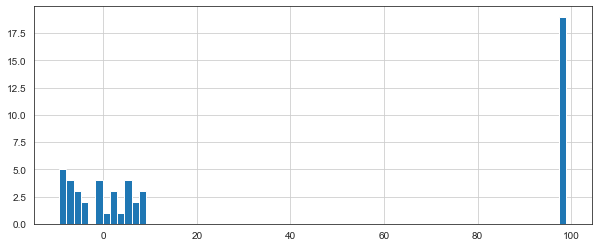

In [83]:
plt.figure(figsize=(10,4))
ratings['Reviews'].hist(bins=70)

##### Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies:

###### Now we will transform the overview column in the vector form so that we can compute similarity. Use the below code to convert it.  We have used TFidfVectorizer for the same. 

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [86]:
matrix = tf.fit_transform(df['Category'])

###### Now we are ready to compute cosine similarity to check what all movies are of the same content on the basis of the overview column that was present in the data set. Use the below code to do so. 

In [87]:
from sklearn.metrics.pairwise import linear_kernel

In [88]:
cosine_similarities = linear_kernel(matrix,matrix)

###### After this, we will reset the index with the movie name that is the original title and will define a function for the recommendation that will search for similar movies by checking cosine similarities and will return us.

In [89]:
movie_title = df['Titles']

In [90]:
indices = pd.Series(df.index, index=df['Titles'])

In [91]:
def movie_recommend(Title):
    idx = indices[Title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return movie_title.iloc[movie_indices]

###### Now we will compute top 10 recommendations for 3 different movies and check the results.

In [92]:
movie_recommend('Heat (1995)').head(10)

14                 Cutthroat Island (1995)
43             Seven (a.k.a. Se7en) (1995)
11      Dracula: Dead and Loving It (1995)
30                  Dangerous Minds (1995)
20                       Get Shorty (1995)
32                             Babe (1995)
44                       Pocahontas (1995)
42    How to Make an American Quilt (1995)
39                      Restoration (1995)
16            Sense and Sensibility (1995)
Name: Titles, dtype: object

In [93]:
movie_recommend('Lamerica (1994)').head(10)

27                            Persuasion (1995)
28                 City of Lost Children (1995)
33                      Dead Man Walking (1995)
48                              Lamerica (1994)
31    Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
34                          It Takes Two (1995)
46                   Usual Suspects, The (1995)
10               American President, The (1995)
18        Ace Ventura: When Nature Calls (1995)
24                     Leaving Las Vegas (1995)
Name: Titles, dtype: object

In [95]:
movie_recommend('Money Train (1995)').head(10)

13                                         Nixon (1995)
25                                       Othello (1995)
23                                        Powder (1995)
6                                        Sabrina (1995)
29    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
7                                   Tom and Huck (1995)
3                              Waiting to Exhale (1995)
2                               Grumpier Old Men (1995)
4                    Father of the Bride Part II (1995)
8                                   Sudden Death (1995)
Name: Titles, dtype: object